# Haberman Surgery

In [180]:
import math
import random

import matplotlib as mpl
import matplotlib.animation
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing


In [171]:
column_names = [
    "age_of_patient", "year_of_operation", "axillary_nodes_detected", "survival_status"
]
target_name = "survival_status"

csv = pd.read_csv("haberman.data", names=column_names)

In [172]:
target_data = csv.iloc[:, -1]
fields_data = csv.iloc[:, :-1]

haberman_dataframe = pd.DataFrame(fields_data, columns=column_names[:-1])

In [173]:
haberman_dataframe.head(10)

,age_of_patient,year_of_operation,axillary_nodes_detected
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
5,33,58,10
6,33,60,0
7,34,59,0
8,34,66,9
9,34,58,30


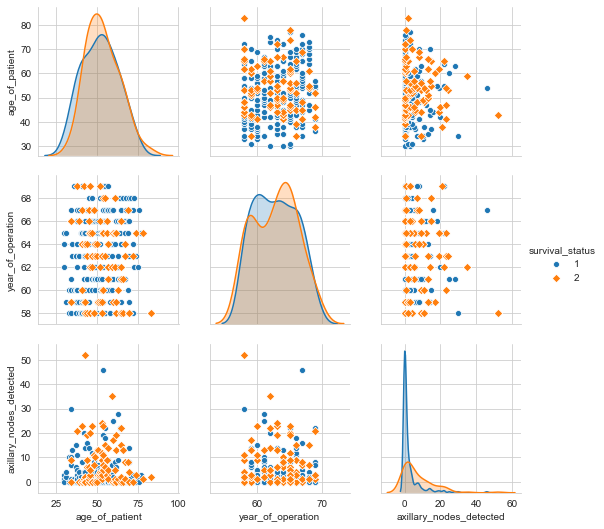

In [174]:
sns.set_style('whitegrid')
sns.pairplot(data=csv, hue=target_name, markers=["o", "D"], vars=column_names[:-1])

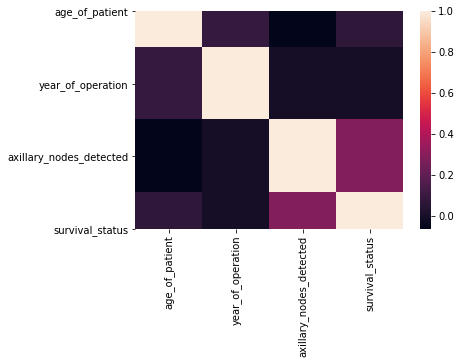

In [22]:
corr = csv.corr()
sns.heatmap(corr)

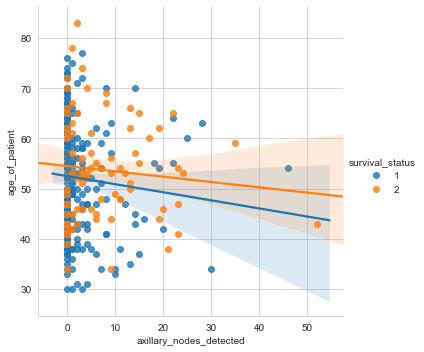

In [175]:
sns.lmplot(x="axillary_nodes_detected", y="age_of_patient", data=csv, hue=target_name, fit_reg=True)

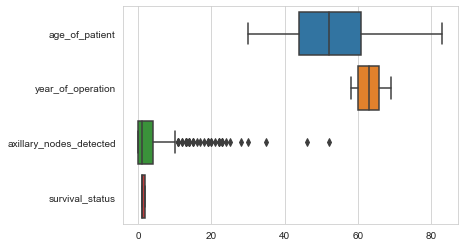

In [178]:
sns.boxplot(data=csv, orient='h')

In [183]:
fields_data_normalized = preprocessing.normalize(fields_data)
fields_data_normalized[:5]

array([[0.42439141, 0.90536833, 0.01414638],
       [0.43514836, 0.8993066 , 0.04351484],
       [0.41905818, 0.90795938, 0.        ],
       [0.46491865, 0.88484517, 0.02999475],
       [0.42981   , 0.90121453, 0.05545936]])

In [271]:
X_train, X_test, y_train, y_test = train_test_split(fields_data, target_data, stratify=target_data)

In [309]:


def print_rendimiento(entrenamiento, prueba, total):
    print("Rendimiento en el conjunto de entrenamiento: ", entrenamiento)
    print("Rendimiento en el conjunto de prueba: ", prueba)
    print("Rendimiento en el conjunto total: ", total)


def generar_modelo(solver="lbfgs", f_activation="logistic", capas=(20,), aprendizaje=0.0001, batch="auto", max_iter=200):
    mlp_modelo = MLPClassifier(
        solver=solver, random_state=0, hidden_layer_sizes=capas, activation=f_activation, alpha=aprendizaje, batch_size=batch, max_iter=max_iter)
    mlp_modelo.fit(X_train, y_train)
    print_rendimiento(
        mlp_modelo.score(X_train, y_train),
        mlp_modelo.score(X_test, y_test),
        mlp_modelo.score(fields_data, target_data)
    )
    return mlp_modelo



In [253]:
def neuronas_capa_oculta(neuronas_entrada: int, neuronas_salida: int):
    return math.pow(neuronas_entrada * neuronas_salida, 1/2)

In [254]:
possible_salida = 2
neuronas_ocultas = neuronas_capa_oculta(len(column_names) - 1, possible_salida)
print(neuronas_ocultas)

2.449489742783178


## Utilizando distinto Número de Capas y Neuronas

In [310]:
generar_modelo()

Rendimiento en el conjunto de entrenamiento:  0.7641921397379913
Rendimiento en el conjunto de prueba:  0.7532467532467533
Rendimiento en el conjunto total:  0.761437908496732


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [311]:
generar_modelo(capas=(2))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [312]:
generar_modelo(capas=(5))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [313]:
generar_modelo(capas=(10))

Rendimiento en el conjunto de entrenamiento:  0.7729257641921398
Rendimiento en el conjunto de prueba:  0.7922077922077922
Rendimiento en el conjunto total:  0.7777777777777778


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [314]:
generar_modelo(capas=(10,5))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [315]:
generar_modelo(capas=(5,5))

Rendimiento en el conjunto de entrenamiento:  0.7467248908296943
Rendimiento en el conjunto de prueba:  0.7792207792207793
Rendimiento en el conjunto total:  0.7549019607843137


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [316]:
generar_modelo(capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.7729257641921398
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7810457516339869


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [321]:
generar_modelo(capas=(8,5))

Rendimiento en el conjunto de entrenamiento:  0.7685589519650655
Rendimiento en el conjunto de prueba:  0.7922077922077922
Rendimiento en el conjunto total:  0.7745098039215687


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Utilizando distinta Función de Activación

In [324]:
generar_modelo(f_activation="tanh")

Rendimiento en el conjunto de entrenamiento:  0.7379912663755459
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.738562091503268


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [326]:
generar_modelo(f_activation="relu", capas=(5, 5))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [328]:
generar_modelo(f_activation="tanh", capas=(5,5))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [329]:
generar_modelo(f_activation="tanh", capas=(20))

Rendimiento en el conjunto de entrenamiento:  0.7379912663755459
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.738562091503268


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [334]:
generar_modelo(f_activation="identity")

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [332]:
generar_modelo(f_activation="identity", capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.7379912663755459
Rendimiento en el conjunto de prueba:  0.7532467532467533
Rendimiento en el conjunto total:  0.7418300653594772


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Utilizando distinto Optimizador de Capas

In [335]:
generar_modelo(solver="adam", capas=(10))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [338]:
generar_modelo(solver="adam", capas=(2), max_iter=1000)

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [340]:
generar_modelo(solver="sgd", capas=(2))

Rendimiento en el conjunto de entrenamiento:  0.7336244541484717
Rendimiento en el conjunto de prueba:  0.7402597402597403
Rendimiento en el conjunto total:  0.7352941176470589


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Utilizando distinto factor de aprendizaje y de tamaño de Batch

In [342]:
generar_modelo(aprendizaje=0.01, capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.759825327510917
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7712418300653595


MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [343]:
generar_modelo(aprendizaje=0.05, capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.7685589519650655
Rendimiento en el conjunto de prueba:  0.7922077922077922
Rendimiento en el conjunto total:  0.7745098039215687


MLPClassifier(activation='logistic', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [346]:
generar_modelo(aprendizaje=0.07, capas=(8,2))

Rendimiento en el conjunto de entrenamiento:  0.7685589519650655
Rendimiento en el conjunto de prueba:  0.7662337662337663
Rendimiento en el conjunto total:  0.7679738562091504


MLPClassifier(activation='logistic', alpha=0.07, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [348]:
generar_modelo(aprendizaje=0.01, capas=(8,2), batch=50)

Rendimiento en el conjunto de entrenamiento:  0.759825327510917
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7712418300653595


MLPClassifier(activation='logistic', alpha=0.01, batch_size=50, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [349]:
generar_modelo(aprendizaje=0.01, capas=(8,2), batch=75)

Rendimiento en el conjunto de entrenamiento:  0.759825327510917
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7712418300653595


MLPClassifier(activation='logistic', alpha=0.01, batch_size=75, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [357]:
generar_modelo(aprendizaje=0.01, capas=(10), batch=100)

Rendimiento en el conjunto de entrenamiento:  0.7685589519650655
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7777777777777778


MLPClassifier(activation='logistic', alpha=0.01, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [358]:
generar_modelo(capas=(10), batch=100)

Rendimiento en el conjunto de entrenamiento:  0.7729257641921398
Rendimiento en el conjunto de prueba:  0.7922077922077922
Rendimiento en el conjunto total:  0.7777777777777778


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [361]:
generar_modelo(capas=(8,2), batch=50)

Rendimiento en el conjunto de entrenamiento:  0.7729257641921398
Rendimiento en el conjunto de prueba:  0.8051948051948052
Rendimiento en el conjunto total:  0.7810457516339869


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=50, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Rendimiento en el conjunto de entrenamiento:  0.7729257641921398
Rendimiento en el conjunto de prueba:  0.7922077922077922
Rendimiento en el conjunto total:  0.7777777777777778


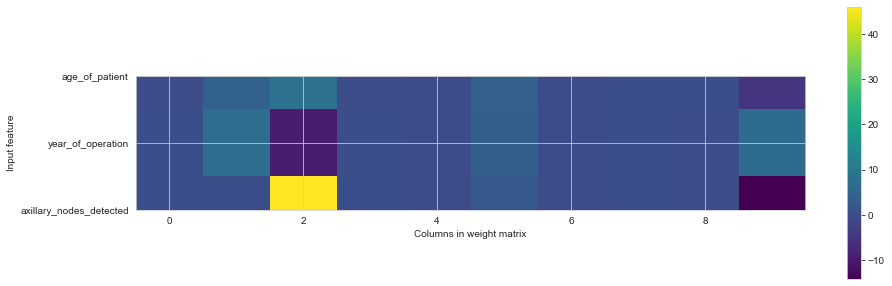

In [293]:
modelo_salida = generar_modelo(capas=(10))

plt.figure(figsize=(15, 5))
plt.imshow(modelo_salida.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(3), column_names[:-1])
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()